In [2]:
import numpy as np
import sys
#sys.path.append("/home/nvu12/software/qed_ci_052223/qed-ci/src")
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)

mol_str = """
    0 1
    Li
    H 1 0.6
    symmetry c1
"""
def basisspec_psi4_yo__anonymous775(mol, role):
    basstrings = {}
    mol.set_basis_all_atoms("6-311++G(d,p)", role=role)
    mol.set_basis_by_symbol("Li", "libasis", role=role)
    basstrings['libasis'] = """
spherical
****
Li     0
S   6   1.00
    900.4600000              0.00228704       
    134.4330000              0.0176350        
     30.4365000              0.0873434        
      8.6263900              0.2809770        
      2.4833200              0.6587410        
      0.3031790              0.1187120        
SP   3   1.00
      4.8689000              0.0933293              0.0327661        
      0.8569240              0.9430450              0.1597920        
      0.2432270             -0.00279827             0.8856670        
SP   1   1.00
      0.0635070              1.0000000              1.0000000        
SP   1   1.00
      0.0243683              1.0000000              1.0000000        
D   1   1.00
      0.2000000              1.0000000        
SP   1   1.00
      0.0074000              1.0000000              1.0000000
****      
"""
    return basstrings
psi4.qcdb.libmintsbasisset.basishorde['ANONYMOUS775'] = basisspec_psi4_yo__anonymous775
options_dict = {'basis': 'anonymous775',
                  'scf_type': 'pk',
                  'e_convergence': 1e-10,
                  'd_convergence': 1e-10
                  }

mol = psi4.geometry(mol_str)

pcqed_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'cas',
    'full_diagonalization' : True,
    'nact_orbs' : 6, 
    'nact_els' : 4,
    'number_of_photons' : 0
}

scqed_dict_np_6 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'cas',
    'nact_orbs' : 6, 
    'nact_els' : 4,
    'full_diagonalization' : True,
    'number_of_photons' : 6
}

scqed_dict_np_1 = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.01]),
    'ci_level' : 'cas',
    'nact_orbs' : 6, 
    'nact_els' : 4,
    'full_diagonalization' : True,
    'number_of_photons' : 1
}

psi4.set_options(options_dict)
psi4.core.set_output_file('lih_0.6.out', False)

pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
scqed_res_np_1 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np_1)
scqed_res_np_6 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np_6)

print(np.shape(H2_PF.H_PF))
for i in range(10):
    print('state', i, pcqed_res.CIeigs[i], scqed_res_np_1.CIeigs[i], scqed_res_np_6.CIeigs[i])

# First compute SCF energy using Psi4
scf_e, wfn = psi4.energy('SCF', return_wfn=True)



Start SCF iterations:

Canonical RHF One-electron energy = -14.2922163088267702
CQED-RHF One-electron energy      = -14.2922163088267702
Nuclear repulsion energy          = 2.6458860533500004
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.4458146707487511   dE = -7.44581E+00   dRMS = 1.69106E-11
SCF Iteration   2: Energy = -7.4458146707487494   dE =  1.77636E-15   dRMS = 3.48494E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.44581467 hartree
Psi4  SCF energy: -7.44581467 hartree
 Completed QED-RHF in 0.18237614631652832 seconds
 Completed 1HSO Build in 0.0011789798736572266 seconds
 Completed ERI Build in 0.05330014228820801 seconds 
 Completed 2D build in 0.060182809829711914 seconds
 Completed 1G build in 9.107589721679688e-05 seconds
 Completed the Dipole Matrix Build in 0.0018420219421386719 seconds
Generating all determinants in active space
 Completed determinant list in 0.0017573833465576172 seconds 
 Completed con

In [4]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50
N_el = 50
r_array = np.linspace(1.4, 2.2, N_R)

# for pcqed results
E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))

# scqed results
sc_E_array_np_1 = np.zeros((N_R, 10))
sc_E_array_np_6 = np.zeros((N_R, 10))

psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    #scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    #fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    # pcqed results
    pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
    #assert np.isclose(fci_energy, pcqed_res.CIeigs[0], 1e-7)
    
    # sort out states with dipole-allowed transition from ground state
    singlet_states = pcqed_res.sort_dipole_allowed_states( N_el)
    
    # store values
    E_array[r_idx, :] = pcqed_res.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = pcqed_res.compute_dipole_moments(singlet_states)
    
    # scqed results
    cqed_res_np_1 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np_1)
    sc_E_array_np_1[r_idx, :] = cqed_res_np_1.CIeigs[:10]
    cqed_res_np_6 = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict_np_6)
    sc_E_array_np_6[r_idx, :] = cqed_res_np_6.CIeigs[:10]

    
    r_idx += 1




Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.7388766216114178
CQED-RHF One-electron energy      = -12.7388766216114178
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9791189287936195   dE = -7.97912E+00   dRMS = 6.28712E-12
SCF Iteration   2: Energy = -7.9791189287936479   dE = -2.84217E-14   dRMS = 1.89625E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.97911893 hartree
Psi4  SCF energy: -7.97911893 hartree
 Completed QED-RHF in 0.17819786071777344 seconds
 Completed 1HSO Build in 0.0013968944549560547 seconds
 Completed ERI Build in 0.052835941314697266 seconds 
 Completed 2D build in 0.05423307418823242 seconds
 Completed 1G build in 0.00010395050048828125 seconds
 Completed the Dipole Matrix Build in 0.0016918182373046875 seconds
Generating all determinants in active space
 Completed determinant list in 0.00176000595092773

 Completed Hamiltonian build in 0.3526742458343506 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.7142262488698581
CQED-RHF One-electron energy      = -12.7136054209142557
Nuclear repulsion energy          = 1.1208796825430838
Dipole energy                     = 0.0006283280780856
SCF Iteration   1: Energy = -7.9800869031972219   dE = -7.98009E+00   dRMS = 6.16042E-06
SCF Iteration   2: Energy = -7.9800869946008710   dE = -9.14036E-08   dRMS = 2.19059E-06
SCF Iteration   3: Energy = -7.9800870081124753   dE = -1.35116E-08   dRMS = 9.71234E-07
SCF Iteration   4: Energy = -7.9800870108891679   dE = -2.77669E-09   dRMS = 4.63948E-07
SCF Iteration   5: Energy = -7.9800870115417375   dE = -6.52570E-10   dRMS = 2.30749E-07
SCF Iteration   6: Energy = -7.9800870117057165   dE = -1.63979E-10   dRMS = 1.17178E-07
SCF Iteration   7: Energy = -7.9800870117483278   dE = -4.26112E-11   dRMS = 6.01289E-08
SCF Iteration   8: Energy = -7.9800870117595935   dE = -1.12657E-11   

 Completed Hamiltonian build in 0.37018299102783203 seconds

Li
H 1 1.4489795918367345
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6658533314746755
CQED-RHF One-electron energy      = -12.6658533314746755
Nuclear repulsion energy          = 1.0956204220914088
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9821417457694803   dE = -7.98214E+00   dRMS = 6.66808E-12
SCF Iteration   2: Energy = -7.9821417457694785   dE =  1.77636E-15   dRMS = 2.00598E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.98214175 hartree
Psi4  SCF energy: -7.98214175 hartree
 Completed QED-RHF in 0.14234185218811035 seconds
 Completed 1HSO Build in 0.0013148784637451172 seconds
 Completed ERI Build in 0.0531010627746582 seconds 
 Completed 2D build in 0.05437111854553223 seconds
 Completed 1G build in 0.0001850128173828125 seconds
 Completed the Dipole Matrix Build in 0.001683950424194336 seconds
Generating all determin

 Completed Hamiltonian build in 0.3574538230895996 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6421232455169168
CQED-RHF One-electron energy      = -12.6414732974509256
Nuclear repulsion energy          = 1.0834129522073814
Dipole energy                     = 0.0006593370903245
SCF Iteration   1: Energy = -7.9827550292307796   dE = -7.98276E+00   dRMS = 6.35648E-06
SCF Iteration   2: Energy = -7.9827551290065530   dE = -9.97758E-08   dRMS = 2.28309E-06
SCF Iteration   3: Energy = -7.9827551440452824   dE = -1.50387E-08   dRMS = 1.02064E-06
SCF Iteration   4: Energy = -7.9827551471729672   dE = -3.12768E-09   dRMS = 4.89510E-07
SCF Iteration   5: Energy = -7.9827551479112637   dE = -7.38297E-10   dRMS = 2.43637E-07
SCF Iteration   6: Energy = -7.9827551480966905   dE = -1.85427E-10   dRMS = 1.23581E-07
SCF Iteration   7: Energy = -7.9827551481447196   dE = -4.80291E-11   dRMS = 6.32818E-08
SCF Iteration   8: Energy = -7.9827551481573744   dE = -1.26548E-11   

 Completed Hamiltonian build in 0.35866332054138184 seconds

Li
H 1 1.4979591836734694
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5955563236451447
CQED-RHF One-electron energy      = -12.5955563236451447
Nuclear repulsion energy          = 1.0597963210965946
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9841699566043562   dE = -7.98417E+00   dRMS = 7.05442E-12
SCF Iteration   2: Energy = -7.9841699566043438   dE =  1.24345E-14   dRMS = 2.12311E-12
Total time for SCF iterations: 0.005 seconds 

QED-RHF   energy: -7.98416996 hartree
Psi4  SCF energy: -7.98416996 hartree
 Completed QED-RHF in 0.1413578987121582 seconds
 Completed 1HSO Build in 0.0013980865478515625 seconds
 Completed ERI Build in 0.05340099334716797 seconds 
 Completed 2D build in 0.05159902572631836 seconds
 Completed 1G build in 0.00016188621520996094 seconds
 Completed the Dipole Matrix Build in 0.0016660690307617188 seconds
Generating all determ

 Completed Hamiltonian build in 0.353992223739624 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5727115165668213
CQED-RHF One-electron energy      = -12.5720312602419817
Nuclear repulsion energy          = 1.0483699456669811
Dipole energy                     = 0.0006916638034824
SCF Iteration   1: Energy = -7.9844809891790112   dE = -7.98448E+00   dRMS = 6.56165E-06
SCF Iteration   2: Energy = -7.9844810982933394   dE = -1.09114E-07   dRMS = 2.38063E-06
SCF Iteration   3: Energy = -7.9844811150469956   dE = -1.67537E-08   dRMS = 1.07259E-06
SCF Iteration   4: Energy = -7.9844811185707263   dE = -3.52373E-09   dRMS = 5.16425E-07
SCF Iteration   5: Energy = -7.9844811194062144   dE = -8.35488E-10   dRMS = 2.57280E-07
SCF Iteration   6: Energy = -7.9844811196160412   dE = -2.09827E-10   dRMS = 1.30411E-07
SCF Iteration   7: Energy = -7.9844811196702876   dE = -5.42464E-11   dRMS = 6.66770E-08
SCF Iteration   8: Energy = -7.9844811196845056   dE = -1.42180E-11   d

 Completed Hamiltonian build in 0.36214399337768555 seconds

Li
H 1 1.546938775510204
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5278790550309367
CQED-RHF One-electron energy      = -12.5278790550309367
Nuclear repulsion energy          = 1.0262407647558049
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9853535068204380   dE = -7.98535E+00   dRMS = 7.43614E-12
SCF Iteration   2: Energy = -7.9853535068204664   dE = -2.84217E-14   dRMS = 2.24051E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.98535351 hartree
Psi4  SCF energy: -7.98535351 hartree
 Completed QED-RHF in 0.1431107521057129 seconds
 Completed 1HSO Build in 0.0013072490692138672 seconds
 Completed ERI Build in 0.052407026290893555 seconds 
 Completed 2D build in 0.05309581756591797 seconds
 Completed 1G build in 0.0001690387725830078 seconds
 Completed the Dipole Matrix Build in 0.0017478466033935547 seconds
Generating all determi

 Completed Hamiltonian build in 0.35204195976257324 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5058833079150453
CQED-RHF One-electron energy      = -12.5051715478242791
Nuclear repulsion energy          = 1.0155228455416452
Dipole energy                     = 0.0007253243335925
SCF Iteration   1: Energy = -7.9854069830607353   dE = -7.98541E+00   dRMS = 6.77607E-06
SCF Iteration   2: Energy = -7.9854071025518047   dE = -1.19491E-07   dRMS = 2.48318E-06
SCF Iteration   3: Energy = -7.9854071212248110   dE = -1.86730E-08   dRMS = 1.12712E-06
SCF Iteration   4: Energy = -7.9854071251943965   dE = -3.96959E-09   dRMS = 5.44732E-07
SCF Iteration   5: Energy = -7.9854071261398412   dE = -9.45445E-10   dRMS = 2.71702E-07
SCF Iteration   6: Energy = -7.9854071263774378   dE = -2.37597E-10   dRMS = 1.37681E-07
SCF Iteration   7: Energy = -7.9854071264387736   dE = -6.13358E-11   dRMS = 7.03213E-08
SCF Iteration   8: Energy = -7.9854071264547928   dE = -1.60192E-11  

 Completed Hamiltonian build in 0.3626439571380615 seconds

Li
H 1 1.5959183673469388
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.4627126140461932
CQED-RHF One-electron energy      = -12.4627126140461932
Nuclear repulsion energy          = 0.9947448845075447
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9858203277306812   dE = -7.98582E+00   dRMS = 7.82971E-12
SCF Iteration   2: Energy = -7.9858203277306954   dE = -1.42109E-14   dRMS = 2.36094E-12
Total time for SCF iterations: 0.005 seconds 

QED-RHF   energy: -7.98582033 hartree
Psi4  SCF energy: -7.98582033 hartree
 Completed QED-RHF in 0.142228364944458 seconds
 Completed 1HSO Build in 0.001277923583984375 seconds
 Completed ERI Build in 0.054145097732543945 seconds 
 Completed 2D build in 0.04953169822692871 seconds
 Completed 1G build in 0.0001552104949951172 seconds
 Completed the Dipole Matrix Build in 0.001728057861328125 seconds
Generating all determinan

 Completed Hamiltonian build in 0.35222601890563965 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4415296659522774
CQED-RHF One-electron energy      = -12.4407851990471396
Nuclear repulsion energy          = 0.9846715185884811
Dipole energy                     = 0.0007603353255273
SCF Iteration   1: Energy = -7.9856543864303617   dE = -7.98565E+00   dRMS = 6.99974E-06
SCF Iteration   2: Energy = -7.9856545174077329   dE = -1.30977E-07   dRMS = 2.59072E-06
SCF Iteration   3: Energy = -7.9856545382218620   dE = -2.08141E-08   dRMS = 1.18426E-06
SCF Iteration   4: Energy = -7.9856545426921350   dE = -4.47027E-09   dRMS = 5.74467E-07
SCF Iteration   5: Energy = -7.9856545437617541   dE = -1.06962E-09   dRMS = 2.86927E-07
SCF Iteration   6: Energy = -7.9856545440308651   dE = -2.69111E-10   dRMS = 1.45406E-07
SCF Iteration   7: Energy = -7.9856545441002851   dE = -6.94200E-11   dRMS = 7.42219E-08
SCF Iteration   8: Energy = -7.9856545441184075   dE = -1.81224E-11  

 Completed Hamiltonian build in 0.3576359748840332 seconds

Li
H 1 1.6448979591836734
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3999488157822846
CQED-RHF One-electron energy      = -12.3999488157822846
Nuclear repulsion energy          = 0.9651246894353599
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9856797051153059   dE = -7.98568E+00   dRMS = 8.26339E-12
SCF Iteration   2: Energy = -7.9856797051152757   dE =  3.01981E-14   dRMS = 2.49279E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.98567971 hartree
Psi4  SCF energy: -7.98567971 hartree
 Completed QED-RHF in 0.14246082305908203 seconds
 Completed 1HSO Build in 0.001332998275756836 seconds
 Completed ERI Build in 0.05310416221618652 seconds 
 Completed 2D build in 0.053153038024902344 seconds
 Completed 1G build in 0.00016570091247558594 seconds
 Completed the Dipole Matrix Build in 0.0020182132720947266 seconds
Generating all determ

 Completed Hamiltonian build in 0.3562040328979492 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3795431369604856
CQED-RHF One-electron energy      = -12.3787647529005795
Nuclear repulsion energy          = 0.9556394345023342
Dipole energy                     = 0.0007967133245955
SCF Iteration   1: Energy = -7.9853269265260032   dE = -7.98533E+00   dRMS = 7.23258E-06
SCF Iteration   2: Energy = -7.9853270701723016   dE = -1.43646E-07   dRMS = 2.70321E-06
SCF Iteration   3: Energy = -7.9853270933675358   dE = -2.31952E-08   dRMS = 1.24404E-06
SCF Iteration   4: Energy = -7.9853270983987450   dE = -5.03121E-09   dRMS = 6.05663E-07
SCF Iteration   5: Energy = -7.9853270996083445   dE = -1.20960E-09   dRMS = 3.02978E-07
SCF Iteration   6: Energy = -7.9853270999131887   dE = -3.04844E-10   dRMS = 1.53599E-07
SCF Iteration   7: Energy = -7.9853270999917942   dE = -7.86056E-11   dRMS = 7.83859E-08
SCF Iteration   8: Energy = -7.9853271000123236   dE = -2.05294E-11   

 Completed Hamiltonian build in 0.35860586166381836 seconds

Li
H 1 1.693877551020408
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3394821880395469
CQED-RHF One-electron energy      = -12.3394821880395469
Nuclear repulsion energy          = 0.9372174694998797
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9850251045237091   dE = -7.98503E+00   dRMS = 8.77558E-12
SCF Iteration   2: Energy = -7.9850251045237268   dE = -1.77636E-14   dRMS = 2.64936E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.98502510 hartree
Psi4  SCF energy: -7.98502510 hartree
 Completed QED-RHF in 0.1416008472442627 seconds
 Completed 1HSO Build in 0.0012543201446533203 seconds
 Completed ERI Build in 0.05338478088378906 seconds 
 Completed 2D build in 0.052668094635009766 seconds
 Completed 1G build in 0.0001399517059326172 seconds
 Completed the Dipole Matrix Build in 0.0016608238220214844 seconds
Generating all determi

 Completed Hamiltonian build in 0.3605048656463623 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3198194392596818
CQED-RHF One-electron energy      = -12.3190059208436455
Nuclear repulsion energy          = 0.9282702860201670
Dipole energy                     = 0.0008344743641052
SCF Iteration   1: Energy = -7.9845133480057893   dE = -7.98451E+00   dRMS = 7.47444E-06
SCF Iteration   2: Energy = -7.9845135055806171   dE = -1.57575E-07   dRMS = 2.82065E-06
SCF Iteration   3: Energy = -7.9845135314163915   dE = -2.58358E-08   dRMS = 1.30651E-06
SCF Iteration   4: Energy = -7.9845135370746494   dE = -5.65826E-09   dRMS = 6.38354E-07
SCF Iteration   5: Energy = -7.9845135384417212   dE = -1.36707E-09   dRMS = 3.19877E-07
SCF Iteration   6: Energy = -7.9845135387869757   dE = -3.45254E-10   dRMS = 1.62272E-07
SCF Iteration   7: Energy = -7.9845135388760884   dE = -8.91127E-11   dRMS = 8.28208E-08
SCF Iteration   8: Energy = -7.9845135388993267   dE = -2.32383E-11   

 Completed Hamiltonian build in 0.36186814308166504 seconds

Li
H 1 1.7428571428571429
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2812111046949823
CQED-RHF One-electron energy      = -12.2812111046949823
Nuclear repulsion energy          = 0.9108788052516398
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9839365470928119   dE = -7.98394E+00   dRMS = 9.41438E-12
SCF Iteration   2: Energy = -7.9839365470928154   dE = -3.55271E-15   dRMS = 2.85022E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.98393655 hartree
Psi4  SCF energy: -7.98393655 hartree
 Completed QED-RHF in 0.15089988708496094 seconds
 Completed 1HSO Build in 0.0011358261108398438 seconds
 Completed ERI Build in 0.05760312080383301 seconds 
 Completed 2D build in 0.06736087799072266 seconds
 Completed 1G build in 0.00018310546875 seconds
 Completed the Dipole Matrix Build in 0.0017428398132324219 seconds
Generating all determinant

 Completed Hamiltonian build in 0.3614199161529541 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2622583710247532
CQED-RHF One-electron energy      = -12.2614084946577862
Nuclear repulsion energy          = 0.9024251736483759
Dipole energy                     = 0.0008736336900554
SCF Iteration   1: Energy = -7.9832896567990081   dE = -7.98329E+00   dRMS = 7.72515E-06
SCF Iteration   2: Energy = -7.9832898296451136   dE = -1.72846E-07   dRMS = 2.94304E-06
SCF Iteration   3: Energy = -7.9832898584017267   dE = -2.87566E-08   dRMS = 1.37169E-06
SCF Iteration   4: Energy = -7.9832898647595014   dE = -6.35777E-09   dRMS = 6.72576E-07
SCF Iteration   5: Energy = -7.9832898663034007   dE = -1.54390E-09   dRMS = 3.37647E-07
SCF Iteration   6: Energy = -7.9832898666943217   dE = -3.90921E-10   dRMS = 1.71440E-07
SCF Iteration   7: Energy = -7.9832898667953307   dE = -1.01009E-10   dRMS = 8.75344E-08
SCF Iteration   8: Energy = -7.9832898668216634   dE = -2.63327E-11   

 Completed Hamiltonian build in 0.3628818988800049 seconds

Li
H 1 1.7918367346938777
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2250383245775271
CQED-RHF One-electron energy      = -12.2250383245775271
Nuclear repulsion energy          = 0.8859800679782459
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9824826136100517   dE = -7.98248E+00   dRMS = 1.02403E-11
SCF Iteration   2: Energy = -7.9824826136100322   dE =  1.95399E-14   dRMS = 3.12232E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.98248261 hartree
Psi4  SCF energy: -7.98248261 hartree
 Completed QED-RHF in 0.15577292442321777 seconds
 Completed 1HSO Build in 0.0014951229095458984 seconds
 Completed ERI Build in 0.05448293685913086 seconds 
 Completed 2D build in 0.05046391487121582 seconds
 Completed 1G build in 9.608268737792969e-05 seconds
 Completed the Dipole Matrix Build in 0.001680135726928711 seconds
Generating all determin

 Completed Hamiltonian build in 0.3571658134460449 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2067642024378742
CQED-RHF One-electron energy      = -12.2058767385690565
Nuclear repulsion energy          = 0.8779802479513544
Dipole energy                     = 0.0009142055664666
SCF Iteration   1: Energy = -7.9817210147147364   dE = -7.98172E+00   dRMS = 7.98458E-06
SCF Iteration   2: Energy = -7.9817212042661563   dE = -1.89551E-07   dRMS = 3.07040E-06
SCF Iteration   3: Energy = -7.9817212362465764   dE = -3.19804E-08   dRMS = 1.43965E-06
SCF Iteration   4: Energy = -7.9817212433832250   dE = -7.13665E-09   dRMS = 7.08365E-07
SCF Iteration   5: Energy = -7.9817212451253621   dE = -1.74214E-09   dRMS = 3.56313E-07
SCF Iteration   6: Energy = -7.9817212455677744   dE = -4.42412E-10   dRMS = 1.81117E-07
SCF Iteration   7: Energy = -7.9817212456822499   dE = -1.14476E-10   dRMS = 9.25351E-08
SCF Iteration   8: Energy = -7.9817212457121531   dE = -2.99032E-11   

 Completed Hamiltonian build in 0.36550307273864746 seconds

Li
H 1 1.8408163265306123
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.1708711556816738
CQED-RHF One-electron energy      = -12.1708711556816738
Nuclear repulsion energy          = 0.8624063189411308
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9807221397336061   dE = -7.98072E+00   dRMS = 1.13109E-11
SCF Iteration   2: Energy = -7.9807221397336097   dE = -3.55271E-15   dRMS = 3.49347E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.98072214 hartree
Psi4  SCF energy: -7.98072214 hartree
 Completed QED-RHF in 0.14431309700012207 seconds
 Completed 1HSO Build in 0.0014510154724121094 seconds
 Completed ERI Build in 0.06597781181335449 seconds 
 Completed 2D build in 0.05856728553771973 seconds
 Completed 1G build in 9.799003601074219e-05 seconds
 Completed the Dipole Matrix Build in 0.00191497802734375 seconds
Generating all determin

 Completed Hamiltonian build in 0.35631418228149414 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1532457543845105
CQED-RHF One-electron energy      = -12.1523194678971578
Nuclear repulsion energy          = 0.8548247249284615
Dipole energy                     = 0.0009562031254741
SCF Iteration   1: Energy = -7.9798633433028243   dE = -7.97986E+00   dRMS = 8.25264E-06
SCF Iteration   2: Energy = -7.9798635510947573   dE = -2.07792E-07   dRMS = 3.20279E-06
SCF Iteration   3: Energy = -7.9798635866265908   dE = -3.55318E-08   dRMS = 1.51043E-06
SCF Iteration   4: Energy = -7.9798635946289558   dE = -8.00236E-09   dRMS = 7.45757E-07
SCF Iteration   5: Energy = -7.9798635965929687   dE = -1.96401E-09   dRMS = 3.75897E-07
SCF Iteration   6: Energy = -7.9798635970933134   dE = -5.00345E-10   dRMS = 1.91317E-07
SCF Iteration   7: Energy = -7.9798635972230674   dE = -1.29754E-10   dRMS = 9.78313E-08
SCF Iteration   8: Energy = -7.9798635972570100   dE = -3.39426E-11  

 Completed Hamiltonian build in 0.36187100410461426 seconds

Li
H 1 1.889795918367347
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.1186214090227509
CQED-RHF One-electron energy      = -12.1186214090227509
Nuclear repulsion energy          = 0.8400545352968682
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9787056527765117   dE = -7.97871E+00   dRMS = 1.26437E-11
SCF Iteration   2: Energy = -7.9787056527765063   dE =  5.32907E-15   dRMS = 3.97506E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.97870565 hartree
Psi4  SCF energy: -7.97870565 hartree
 Completed QED-RHF in 0.14243388175964355 seconds
 Completed 1HSO Build in 0.0015251636505126953 seconds
 Completed ERI Build in 0.055090904235839844 seconds 
 Completed 2D build in 0.04891204833984375 seconds
 Completed 1G build in 0.0001468658447265625 seconds
 Completed the Dipole Matrix Build in 0.0016689300537109375 seconds
Generating all determ

 Completed Hamiltonian build in 0.3559589385986328 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1016163089282127
CQED-RHF One-electron energy      = -12.1006499594938415
Nuclear repulsion energy          = 0.8328592073714133
Dipole energy                     = 0.0009996382425854
SCF Iteration   1: Energy = -7.9777646838078038   dE = -7.97776E+00   dRMS = 8.52930E-06
SCF Iteration   2: Energy = -7.9777649114875899   dE = -2.27680E-07   dRMS = 3.34030E-06
SCF Iteration   3: Energy = -7.9777649509252058   dE = -3.94376E-08   dRMS = 1.58408E-06
SCF Iteration   4: Energy = -7.9777649598882832   dE = -8.96308E-09   dRMS = 7.84793E-07
SCF Iteration   5: Energy = -7.9777649621002364   dE = -2.21195E-09   dRMS = 3.96425E-07
SCF Iteration   6: Energy = -7.9777649626657272   dE = -5.65491E-10   dRMS = 2.02055E-07
SCF Iteration   7: Energy = -7.9777649628127207   dE = -1.46994E-10   dRMS = 1.03432E-07
SCF Iteration   8: Energy = -7.9777649628512641   dE = -3.85434E-11   

 Completed Hamiltonian build in 0.36313700675964355 seconds

Li
H 1 1.9387755102040818
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0682052512560922
CQED-RHF One-electron energy      = -12.0682052512560922
Nuclear repulsion energy          = 0.8188321049314738
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9764765905792316   dE = -7.97648E+00   dRMS = 1.41910E-11
SCF Iteration   2: Energy = -7.9764765905792316   dE =  0.00000E+00   dRMS = 4.55012E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.97647659 hartree
Psi4  SCF energy: -7.97647659 hartree
 Completed QED-RHF in 0.14420032501220703 seconds
 Completed 1HSO Build in 0.0011489391326904297 seconds
 Completed ERI Build in 0.05508828163146973 seconds 
 Completed 2D build in 0.05073285102844238 seconds
 Completed 1G build in 0.0001621246337890625 seconds
 Completed the Dipole Matrix Build in 0.0016999244689941406 seconds
Generating all determ

 Completed Hamiltonian build in 0.35628700256347656 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0517934442509187
CQED-RHF One-electron energy      = -12.0507857866686390
Nuclear repulsion energy          = 0.8119942585437370
Dipole energy                     = 0.0010445214286891
SCF Iteration   1: Energy = -7.9754663510021357   dE = -7.97547E+00   dRMS = 8.81459E-06
SCF Iteration   2: Energy = -7.9754666003415826   dE = -2.49339E-07   dRMS = 3.48302E-06
SCF Iteration   3: Energy = -7.9754666440685513   dE = -4.37270E-08   dRMS = 1.66068E-06
SCF Iteration   4: Energy = -7.9754666540961585   dE = -1.00276E-08   dRMS = 8.25510E-07
SCF Iteration   5: Energy = -7.9754666565847652   dE = -2.48861E-09   dRMS = 4.17920E-07
SCF Iteration   6: Energy = -7.9754666572233690   dE = -6.38604E-10   dRMS = 2.13347E-07
SCF Iteration   7: Energy = -7.9754666573898350   dE = -1.66466E-10   dRMS = 1.09346E-07
SCF Iteration   8: Energy = -7.9754666574335635   dE = -4.37286E-11  

 Completed Hamiltonian build in 0.3639249801635742 seconds

Li
H 1 1.9877551020408164
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0195430199997837
CQED-RHF One-electron energy      = -12.0195430199997837
Nuclear repulsion energy          = 0.7986555438243326
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9740723355124716   dE = -7.97407E+00   dRMS = 1.58721E-11
SCF Iteration   2: Energy = -7.9740723355124805   dE = -8.88178E-15   dRMS = 5.18747E-12
Total time for SCF iterations: 0.007 seconds 

QED-RHF   energy: -7.97407234 hartree
Psi4  SCF energy: -7.97407234 hartree
 Completed QED-RHF in 0.14571714401245117 seconds
 Completed 1HSO Build in 0.0011148452758789062 seconds
 Completed ERI Build in 0.055509090423583984 seconds 
 Completed 2D build in 0.051599979400634766 seconds
 Completed 1G build in 0.00013899803161621094 seconds
 Completed the Dipole Matrix Build in 0.0017271041870117188 seconds
Generating all dete

 Completed Hamiltonian build in 0.35756802558898926 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0036988458299483
CQED-RHF One-electron energy      = -12.0026486303741997
Nuclear repulsion energy          = 0.7921491850151733
Dipole energy                     = 0.0010908617369986
SCF Iteration   1: Energy = -7.9730039118924410   dE = -7.97300E+00   dRMS = 9.10863E-06
SCF Iteration   2: Energy = -7.9730041848007058   dE = -2.72908E-07   dRMS = 3.63108E-06
SCF Iteration   3: Energy = -7.9730042332321620   dE = -4.84315E-08   dRMS = 1.74029E-06
SCF Iteration   4: Energy = -7.9730042444377673   dE = -1.12056E-08   dRMS = 8.67950E-07
SCF Iteration   5: Energy = -7.9730042472345737   dE = -2.79681E-09   dRMS = 4.40408E-07
SCF Iteration   6: Energy = -7.9730042479550924   dE = -7.20519E-10   dRMS = 2.25206E-07
SCF Iteration   7: Energy = -7.9730042481434857   dE = -1.88393E-10   dRMS = 1.15581E-07
SCF Iteration   8: Energy = -7.9730042481931047   dE = -4.96190E-11  

 Completed Hamiltonian build in 0.3636600971221924 seconds

Li
H 1 2.036734693877551
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9725590335022218
CQED-RHF One-electron energy      = -11.9725590335022218
Nuclear repulsion energy          = 0.7794493984818638
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9715250910841515   dE = -7.97153E+00   dRMS = 2.26667E-12
SCF Iteration   2: Energy = -7.9715250910841409   dE =  1.06581E-14   dRMS = 9.09965E-13
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.97152509 hartree
Psi4  SCF energy: -7.97152509 hartree
 Completed QED-RHF in 0.1491379737854004 seconds
 Completed 1HSO Build in 0.00136566162109375 seconds
 Completed ERI Build in 0.05375218391418457 seconds 
 Completed 2D build in 0.05361604690551758 seconds
 Completed 1G build in 0.0001609325408935547 seconds
 Completed the Dipole Matrix Build in 0.0016889572143554688 seconds
Generating all determinant

 Completed Hamiltonian build in 0.35749387741088867 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9572581175779309
CQED-RHF One-electron energy      = -11.9561640903723259
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0011386666900140
SCF Iteration   1: Energy = -7.9704080152398102   dE = -7.97041E+00   dRMS = 9.41156E-06
SCF Iteration   2: Energy = -7.9704083137762254   dE = -2.98536E-07   dRMS = 3.78464E-06
SCF Iteration   3: Energy = -7.9704083673614736   dE = -5.35852E-08   dRMS = 1.82297E-06
SCF Iteration   4: Energy = -7.9704083798687702   dE = -1.25073E-08   dRMS = 9.12151E-07
SCF Iteration   5: Energy = -7.9704083830084542   dE = -3.13968E-09   dRMS = 4.63912E-07
SCF Iteration   6: Energy = -7.9704083838206774   dE = -8.12223E-10   dRMS = 2.37648E-07
SCF Iteration   7: Energy = -7.9704083840337230   dE = -2.13046E-10   dRMS = 1.22148E-07
SCF Iteration   8: Energy = -7.9704083840899855   dE = -5.62626E-11  

 Completed Hamiltonian build in 0.36629605293273926 seconds

Li
H 1 2.085714285714286
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9271814074564659
CQED-RHF One-electron energy      = -11.9271814074564659
Nuclear repulsion energy          = 0.7611453030184931
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9688626244392236   dE = -7.96886E+00   dRMS = 2.42853E-12
SCF Iteration   2: Energy = -7.9688626244392093   dE =  1.42109E-14   dRMS = 9.75531E-13
Total time for SCF iterations: 0.005 seconds 

QED-RHF   energy: -7.96886262 hartree
Psi4  SCF energy: -7.96886262 hartree
 Completed QED-RHF in 0.1470201015472412 seconds
 Completed 1HSO Build in 0.001168966293334961 seconds
 Completed ERI Build in 0.05451512336730957 seconds 
 Completed 2D build in 0.04980802536010742 seconds
 Completed 1G build in 0.00015997886657714844 seconds
 Completed the Dipole Matrix Build in 0.0016617774963378906 seconds
Generating all determin

 Completed Hamiltonian build in 0.35626769065856934 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9124006013396375
CQED-RHF One-electron energy      = -11.9112615047757657
Nuclear repulsion energy          = 0.7552334948397089
Dipole energy                     = 0.0011879422064996
SCF Iteration   1: Energy = -7.9677050939974059   dE = -7.96771E+00   dRMS = 9.72363E-06
SCF Iteration   2: Energy = -7.9677054203878814   dE = -3.26390E-07   dRMS = 3.94386E-06
SCF Iteration   3: Energy = -7.9677054796134144   dE = -5.92255E-08   dRMS = 1.90881E-06
SCF Iteration   4: Energy = -7.9677054935573075   dE = -1.39439E-08   dRMS = 9.58154E-07
SCF Iteration   5: Energy = -7.9677054970779349   dE = -3.52063E-09   dRMS = 4.88457E-07
SCF Iteration   6: Energy = -7.9677054979925810   dE = -9.14646E-10   dRMS = 2.50686E-07
SCF Iteration   7: Energy = -7.9677054982333111   dE = -2.40730E-10   dRMS = 1.29054E-07
SCF Iteration   8: Energy = -7.9677054982970841   dE = -6.37730E-11  

 Completed Hamiltonian build in 0.36501502990722656 seconds

Li
H 1 2.1346938775510207
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.8833418775172710
CQED-RHF One-electron energy      = -11.8833418775172710
Nuclear repulsion energy          = 0.7436811660467495
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9661088947844361   dE = -7.96611E+00   dRMS = 2.57280E-12
SCF Iteration   2: Energy = -7.9661088947844148   dE =  2.13163E-14   dRMS = 1.03258E-12
Total time for SCF iterations: 0.006 seconds 

QED-RHF   energy: -7.96610889 hartree
Psi4  SCF energy: -7.96610889 hartree
 Completed QED-RHF in 0.1466047763824463 seconds
 Completed 1HSO Build in 0.0011529922485351562 seconds
 Completed ERI Build in 0.05451178550720215 seconds 
 Completed 2D build in 0.05043196678161621 seconds
 Completed 1G build in 0.00018930435180664062 seconds
 Completed the Dipole Matrix Build in 0.001967906951904297 seconds
Generating all determi

 Completed Hamiltonian build in 0.3570256233215332 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8690592011906730
CQED-RHF One-electron energy      = -11.8678737743859273
Nuclear repulsion energy          = 0.7380365272152751
Dipole energy                     = 0.0012386925831458
SCF Iteration   1: Energy = -7.9649179597600028   dE = -7.96492E+00   dRMS = 1.00451E-05
SCF Iteration   2: Energy = -7.9649183164096904   dE = -3.56650E-07   dRMS = 4.10894E-06
SCF Iteration   3: Energy = -7.9649183818016223   dE = -6.53919E-08   dRMS = 1.99786E-06
SCF Iteration   4: Energy = -7.9649183973291073   dE = -1.55275E-08   dRMS = 1.00600E-06
SCF Iteration   5: Energy = -7.9649184012723069   dE = -3.94320E-09   dRMS = 5.14065E-07
SCF Iteration   6: Energy = -7.9649184023012047   dE = -1.02890E-09   dRMS = 2.64336E-07
SCF Iteration   7: Energy = -7.9649184025729909   dE = -2.71786E-10   dRMS = 1.36308E-07
SCF Iteration   8: Energy = -7.9649184026452016   dE = -7.22107E-11   

 Completed Hamiltonian build in 0.3625922203063965 seconds

Li
H 1 2.183673469387755
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.8409756275939984
CQED-RHF One-electron energy      = -11.8409756275939984
Nuclear repulsion energy          = 0.7270004669952337
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.9632845851093101   dE = -7.96328E+00   dRMS = 2.69310E-12
SCF Iteration   2: Energy = -7.9632845851092942   dE =  1.59872E-14   dRMS = 1.07801E-12
Total time for SCF iterations: 0.005 seconds 

QED-RHF   energy: -7.96328459 hartree
Psi4  SCF energy: -7.96328459 hartree
 Completed QED-RHF in 0.1489109992980957 seconds
 Completed 1HSO Build in 0.0014002323150634766 seconds
 Completed ERI Build in 0.05455207824707031 seconds 
 Completed 2D build in 0.0531158447265625 seconds
 Completed 1G build in 0.00014090538024902344 seconds
 Completed the Dipole Matrix Build in 0.0016760826110839844 seconds
Generating all determina

 Completed Hamiltonian build in 0.3571438789367676 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8271702122665943
CQED-RHF One-electron energy      = -11.8259371915733844
Nuclear repulsion energy          = 0.7216052872772727
Dipole energy                     = 0.0012909204622961
SCF Iteration   1: Energy = -7.9620663057787162   dE = -7.96207E+00   dRMS = 1.03762E-05
SCF Iteration   2: Energy = -7.9620666952876693   dE = -3.89509E-07   dRMS = 4.28007E-06
SCF Iteration   3: Energy = -7.9620667674148606   dE = -7.21272E-08   dRMS = 2.09021E-06
SCF Iteration   4: Energy = -7.9620667846856623   dE = -1.72708E-08   dRMS = 1.05572E-06
SCF Iteration   5: Energy = -7.9620667890970065   dE = -4.41134E-09   dRMS = 5.40760E-07
SCF Iteration   6: Energy = -7.9620667902531519   dE = -1.15615E-09   dRMS = 2.78611E-07
SCF Iteration   7: Energy = -7.9620667905596871   dE = -3.06535E-10   dRMS = 1.43919E-07
SCF Iteration   8: Energy = -7.9620667906414138   dE = -8.17266E-11   

In [5]:
from matplotlib import pyplot as plt

np_1_safe_1 = np.copy(sc_E_array_np_1[:,1])
np_1_safe_2 = np.copy(sc_E_array_np_1[:,2])

np_6_safe_1 = np.copy(sc_E_array_np_6[:,1])
np_6_safe_2 = np.copy(sc_E_array_np_6[:,2])
#sc_E_array[:,1] = np.copy(safe_1)
#sc_E_array[:,2] = np.copy(safe_2)

#sc_E_array_np_1[:,1] = np.copy(np_1_safe_1)
#sc_E_array_np_1[:,2] = np.copy(np_1_safe_2)


In [10]:
nop = np.copy(sc_E_array_np_1[36:,1])
lup = np.copy(sc_E_array_np_1[36:,2])
#E_array[10,2] = nop1
#E_array[10,1] = lup1

sc_E_array_np_1[36:,2] = np.copy(nop)
sc_E_array_np_1[36:,1] = np.copy(lup)

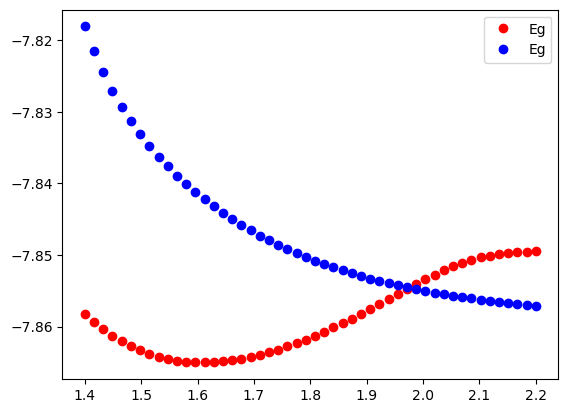

In [11]:
#print(r_array)
#print(E_array[:,1]-E_array[:,0])

#plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
#plt.plot(r_array, E_array[:,1], label="E1")
#plt.plot(r_array, E_array[:,2], label="E2")

plt.plot(r_array, sc_E_array_np_1[:,1], 'ro', label="Eg")
plt.plot(r_array, sc_E_array_np_1[:,2], 'bo', label="Eg")
#plt.plot(r_array, E_array[:,3], label="E3")
plt.legend()
#plt.xlim(1.79, 1.81)
plt.show()

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [12]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF


def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR
                
            

        
        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [13]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = 0.12086
lambda_vector = np.array([0., 0., 0.01])
N_el = 3
N_ph = 2

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
print("H")
print(_HPF)

H
[[-7.978928  0.000009 -0.        0.       -0.001142  0.      ]
 [ 0.000009 -7.801939 -0.       -0.001142  0.        0.      ]
 [-0.       -0.       -7.739514  0.        0.        0.      ]
 [ 0.       -0.001142  0.       -7.858068  0.000009 -0.      ]
 [-0.001142  0.        0.        0.000009 -7.681079 -0.      ]
 [ 0.        0.        0.       -0.       -0.       -7.618654]]


In [21]:
N_el = 50
N_ph = 6
pcqed_nel50_np6 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel50_np6[k,:] = pf_e



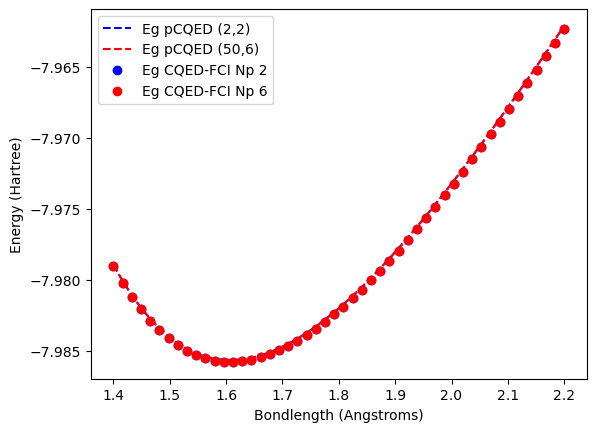

In [22]:


plt.plot(r_array, pcqed_nel2_np2[:,0], 'b--', label="Eg pCQED (2,2)")
plt.plot(r_array, pcqed_nel50_np6[:,0], 'r--', label="Eg pCQED (50,6)")
plt.plot(r_array, sc_E_array_np_1[:,0], 'bo', label="Eg CQED-FCI Np 2")
plt.plot(r_array, sc_E_array_np_6[:,0], 'ro', label="Eg CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

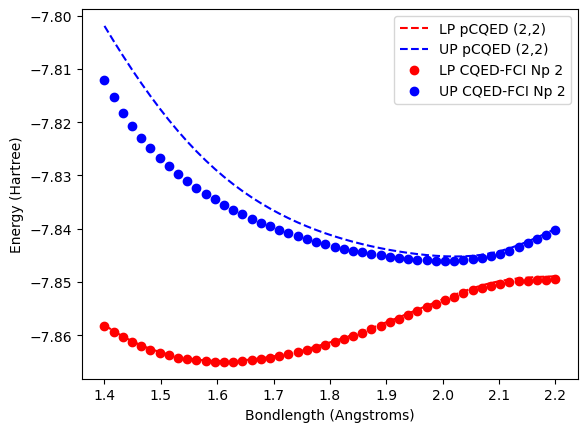

In [20]:

plt.plot(r_array, pcqed_nel2_np2[:,1], 'r--', label="LP pCQED (2,2)")
plt.plot(r_array, pcqed_nel2_np2[:,2], 'b--', label="UP pCQED (2,2)")
plt.plot(r_array, sc_E_array_np_1[:,1], 'ro', label="LP CQED-FCI Np 2")
plt.plot(r_array, sc_E_array_np_1[:,3], 'bo', label="UP CQED-FCI Np 2")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

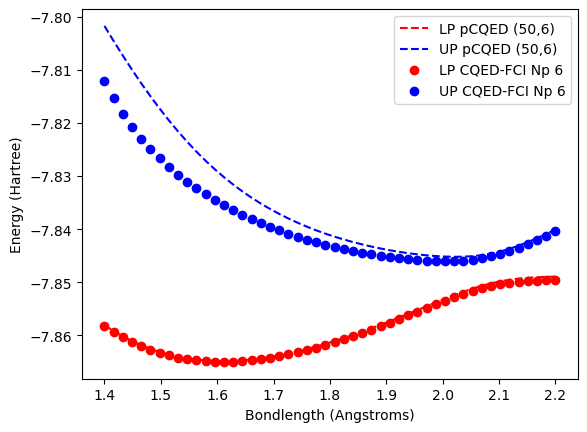

In [23]:
plt.plot(r_array, pcqed_nel50_np6[:,1], 'r--', label="LP pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,2], 'b--', label="UP pCQED (50,6)")
plt.plot(r_array, sc_E_array_np_6[:,1], 'ro', label="LP CQED-FCI Np 6")
plt.plot(r_array, sc_E_array_np_6[:,3], 'bo', label="UP CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

In [ ]:
for i in range(N_R):
    print(F'{r_array[i]}, {pf_array[i,0]}, {pf_array[i,1]}, {pf_array[i,2]}, {pf_array[i,3]}, {pf_array[i,3]} ')
      